## Abstract
This document tries to find any meaningful relationships between the level of education, the health status and the financial status of a sample of a survey of pensioner in Bulgaria. The data is provided by the World bank. One way, two way ANOVA as well as kruskal–wallis statistical non parametric test have been used.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Table of Contents
* [1. Reading the files.](#first-bullet)
<br>
* [2. Dataset of interest.](#second-bullet)
<br>
* [3. Data prep.](#third-bullet)
<br>
* [4. Exploratory Data Analysis.](#fourth-bullet)
<br>
* [5. Modeling and Hypothesis Testing.](#fifth-bullet)
<br>
* [6. Conclusion.](#sixth-bullet)
<br>
* [7. References.](#seventh-bullet)

## 1. Reading the files

In [3]:
edu = pd.read_stata('data/Education_wb_section_5b.dta')

The file is stored as edu. Below we see a preview of the top 5 rows. We have 55 columns.

In [4]:
edu.head()

,resp,id,district,city,cluster,location,id_hh,id_hhm,s5b_q1,s5b_q2,...,s5b_q23_8_1,s5b_q23_8_2,s5b_q23_9_1,s5b_q23_9_2,s5b_q23_10_1,s5b_q23_10_2,lp_type,lp_size,lp_eu_region,weight
0,1,244,blagoevgrad,65334,25,urban location,4,1,1,turkish,...,NaN,NaN,NaN,NaN,NaN,NaN,municipality center,20 000 - 49 999,SW,1.148
1,1,244,blagoevgrad,65334,25,urban location,4,2,1,turkish,...,0.0,0.0,0.0,0.0,0.0,0.0,municipality center,20 000 - 49 999,SW,1.148
2,1,244,blagoevgrad,65334,25,urban location,4,3,1,turkish,...,0.0,0.0,0.0,0.0,0.0,0.0,municipality center,20 000 - 49 999,SW,1.148
3,2,8102,haskovo,77195,805,urban location,2,1,1,bulgarian,...,NaN,NaN,NaN,NaN,NaN,NaN,regional center,50 000 - 99 999,SC,0.956
4,2,8102,haskovo,77195,805,urban location,2,2,1,bulgarian,...,NaN,NaN,NaN,NaN,NaN,NaN,regional center,50 000 - 99 999,SC,0.956


The file has 11439 rows and 55 columns. The names of columns have been commented out with #.

In [5]:
edu.shape

(11439, 55)

In [6]:
#list(edu.columns)

We identify the columns of interest, later they are renamed. There is a preview of the first 5 rows in the new dataframe edu_use.

In [7]:
edu_use = edu[['id','s5b_q4']]

In [8]:
edu_use = edu_use.rename(index=str, columns={"id": "id", "s5b_q4": "education"})

In [9]:
edu_use.head()

,id,education
0,244,initial
1,244,not finished initial
2,244,not finished initial
3,8102,"higher, specialist"
4,8102,primary


The code for the pension dataset is analogous of the one above so it will be discussed only briefly.

In [10]:
pen = pd.read_stata('data/Pension_wb_section_8.dta')

In [11]:
pen.head()

,resp,id,district,city,cluster,location,id_hh,id_hhm,s8_q1,s8_q2,...,s8_q5_2_o,s8_q5_3,s8_q5_3_o,s8_q6_1,s8_q6_2,s8_q6_3,lp_type,lp_size,lp_eu_region,weight
0,1,244,blagoevgrad,65334,25,urban location,4,1,2,no,...,NaN,NaN,NaN,NaN,NaN,NaN,municipality center,20 000 - 49 999,SW,1.148
1,1,244,blagoevgrad,65334,25,urban location,4,2,2,yes,...,NaN,NaN,NaN,240.0,NaN,NaN,municipality center,20 000 - 49 999,SW,1.148
2,1,244,blagoevgrad,65334,25,urban location,4,3,2,yes,...,NaN,NaN,NaN,240.0,NaN,NaN,municipality center,20 000 - 49 999,SW,1.148
3,2,8102,haskovo,77195,805,urban location,2,1,1,yes,...,NaN,NaN,NaN,1980.0,208.0,NaN,regional center,50 000 - 99 999,SC,0.956
4,2,8102,haskovo,77195,805,urban location,2,2,1,yes,...,NaN,NaN,NaN,1032.0,NaN,NaN,regional center,50 000 - 99 999,SC,0.956


In [12]:
pen.shape

(12115, 29)

In [13]:
#list(pen.columns)

In [14]:
pen_use = pen[['id','s8_q6_1', 's8_q6_2', 's8_q6_3']]

In [15]:
pen_use = pen_use.rename(index=str, columns={"id": "id", "s8_q6_1": "pention1", 's8_q6_2':'pention2',
                                            's8_q6_3': 'pention3'})

Several variables have NaN or Not a number values.

In [16]:
pen_use.head()

,id,pention1,pention2,pention3
0,244,NaN,NaN,NaN
1,244,240.0,NaN,NaN
2,244,240.0,NaN,NaN
3,8102,1980.0,208.0,NaN
4,8102,1032.0,NaN,NaN


In [17]:
health = pd.read_stata('data/Health_wb_section_6.dta')

In [18]:
health.head()

,resp,id,district,city,cluster,location,id_hh,id_hhm,s6_q1,s6_q2,...,s6_q39_6,s6_q39_7_1,s6_q39_7_2,s6_q39_8,s6_q39_9_1,s6_q39_9_2,lp_type,lp_size,lp_eu_region,weight
0,1,244,blagoevgrad,65334,25,urban location,4,1,1,good,...,20,0,0,0,0,0,municipality center,20 000 - 49 999,SW,1.148
1,1,244,blagoevgrad,65334,25,urban location,4,2,1,good,...,30,0,0,0,0,0,municipality center,20 000 - 49 999,SW,1.148
2,1,244,blagoevgrad,65334,25,urban location,4,3,1,good,...,30,0,0,0,0,0,municipality center,20 000 - 49 999,SW,1.148
3,2,8102,haskovo,77195,805,urban location,2,1,1,poor,...,180,0,0,0,0,0,regional center,50 000 - 99 999,SC,0.956
4,2,8102,haskovo,77195,805,urban location,2,2,1,poor,...,180,0,0,0,0,0,regional center,50 000 - 99 999,SC,0.956


In [19]:
health.shape

(12115, 88)

In [20]:
#list(health.columns)

In [21]:
health_use = health[['id', 's6_q2']]

In [22]:
health_use = health_use.rename(index=str, columns={"id": "id", "s6_q2": "health"})

In [23]:
health_use.head()

,id,health
0,244,good
1,244,good
2,244,good
3,8102,poor
4,8102,poor


In [24]:
fin = pd.read_stata('data/Financial situation_wb_section_14.dta')

In [25]:
fin.shape

(4300, 49)

In [26]:
fin.head()

,resp,id,district,city,cluster,location,id_hh,s14_id,s14_q1_1,s14_q1_2,...,s14_q16,s14_q17,s14_q18,s14_q19_1,s14_q19_2,s14_q19_3,lp_type,lp_size,lp_eu_region,weight
0,1,244,blagoevgrad,65334,25,urban location,4,1.0,strongly agree,strongly agree,...,less than enough,improve somewhat,40.0,500.0,300.0,100.0,municipality center,20 000 - 49 999,SW,1.148
1,2,8102,haskovo,77195,805,urban location,2,1.0,agree,agree,...,enough,remain the same,270.0,5000.0,2500.0,200.0,regional center,50 000 - 99 999,SC,0.956
2,3,2985,lovech,15552,297,rural location,5,1.0,strongly agree,disagree,...,less than enough,remain the same,90.0,400.0,250.0,90.0,common,under 1000,NC,1.148
3,4,2984,lovech,15552,297,rural location,4,1.0,neither agree nor disagree,neither agree nor disagree,...,enough,remain the same,160.0,500.0,300.0,100.0,common,under 1000,NC,1.148
4,5,2665,kjistendil,41112,265,urban location,5,1.0,strongly agree,agree,...,less than enough,improve somewhat,153.0,700.0,350.0,200.0,regional center,20 000 - 49 999,SW,1.148


In [27]:
fin_use = fin[['id','s14_q13']]

In [28]:
fin_use = fin_use.rename(index=str, columns={"id": "id", "s14_q13": "financial_situation"})

In [29]:
fin_use.head()

,id,financial_situation
0,244,poor
1,8102,poor
2,2985,poor
3,2984,poor
4,2665,poor


## 2. Dataset of interest
We use pandas merge function to create a left join between the pen_use and the health_use dataset on the id 
column as key.

In [30]:
data_use =  pd.merge(pen_use, health_use, on='id', how='left')

In [31]:
data_use.head()

,id,pention1,pention2,pention3,health
0,244,NaN,NaN,NaN,good
1,244,NaN,NaN,NaN,good
2,244,NaN,NaN,NaN,good
3,244,240.0,NaN,NaN,good
4,244,240.0,NaN,NaN,good


In [32]:
data_use.shape

(43085, 5)

In [33]:
data_use = pd.merge(data_use, edu_use, on='id', how='left')

In [34]:
data_use.head()

,id,pention1,pention2,pention3,health,education
0,244,NaN,NaN,NaN,good,initial
1,244,NaN,NaN,NaN,good,not finished initial
2,244,NaN,NaN,NaN,good,not finished initial
3,244,NaN,NaN,NaN,good,initial
4,244,NaN,NaN,NaN,good,not finished initial


In [35]:
data_use.shape

(168968, 6)

In [36]:
data_use = pd.merge(data_use, fin_use, on='id', how='left')

In [37]:
data_use.shape

(168995, 7)

Now we see a preview of the final dataset.

In [38]:
data_use.head()

,id,pention1,pention2,pention3,health,education,financial_situation
0,244,NaN,NaN,NaN,good,initial,poor
1,244,NaN,NaN,NaN,good,not finished initial,poor
2,244,NaN,NaN,NaN,good,not finished initial,poor
3,244,NaN,NaN,NaN,good,initial,poor
4,244,NaN,NaN,NaN,good,not finished initial,poor


## 3. Data prep
Below we use the describe function to get the descriptive statistics of the numerical data.

In [39]:
data_use.describe()

,id,pention1,pention2,pention3
count,168995.000000,52470.000000,10033.000000,1221.000000
mean,4339.347720,1213.292834,380.882288,258.638002
std,2497.386079,861.293243,422.236855,197.779505
min,1.000000,18.000000,12.000000,8.000000
25%,2163.000000,456.000000,192.000000,170.000000
50%,4352.000000,1150.000000,240.000000,200.000000
75%,6505.000000,1600.000000,432.000000,250.000000
max,8941.000000,9999.000000,9999.000000,1800.000000


We use the info function to get the number of non-null values of the columns. pention2 and pention3 have a lot of
null values and will be subsequently dropped.

In [40]:
data_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168995 entries, 0 to 168994
Data columns (total 7 columns):
id                     168995 non-null int16
pention1               52470 non-null float64
pention2               10033 non-null float64
pention3               1221 non-null float64
health                 168995 non-null category
education              168995 non-null category
financial_situation    168820 non-null category
dtypes: category(3), float64(3), int16(1)
memory usage: 6.0 MB


In [41]:
data_use = data_use[['pention1', 'health','education', 'financial_situation']]

In [42]:
data_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168995 entries, 0 to 168994
Data columns (total 4 columns):
pention1               52470 non-null float64
health                 168995 non-null category
education              168995 non-null category
financial_situation    168820 non-null category
dtypes: category(3), float64(1)
memory usage: 3.1 MB


All null values are dropped. We are left with 52392 rows and 4 columns.

In [43]:
data_use = data_use.dropna()

In [44]:
data_use.shape

(52392, 4)

In [45]:
data_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52392 entries, 9 to 168993
Data columns (total 4 columns):
pention1               52392 non-null float64
health                 52392 non-null category
education              52392 non-null category
financial_situation    52392 non-null category
dtypes: category(3), float64(1)
memory usage: 972.9 KB


In [46]:
data_use.head()

,pention1,health,education,financial_situation
9,240.0,good,initial,poor
10,240.0,good,not finished initial,poor
11,240.0,good,not finished initial,poor
12,240.0,good,initial,poor
13,240.0,good,not finished initial,poor


The below code is commented out. It is used to export the data to a csv file.

In [47]:
#data_use.to_csv('data_use.csv')

Dummy variables are being created and the original columns have been dropped.

In [48]:
data_final = pd.concat([data_use.drop(['health', 'education', 'financial_situation'], axis=1),
                        pd.get_dummies(data_use[['health', 'education', 'financial_situation']])], axis = 1)

In [49]:
data_final.head()

,pention1,health_excellent,health_good,health_satisfactory,health_poor,health_don't know,"education_higher, ph.d.","education_higher, master","education_higher, bachelor","education_higher, specialist",...,education_vocational-technical,education_primary,education_initial,education_not finished initial,education_never been to school,financial_situation_very poor,financial_situation_poor,financial_situation_good,financial_situation_very good,financial_situation_rich
9,240.0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
10,240.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
11,240.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
12,240.0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
13,240.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [50]:
#data_final.to_csv('data_final.csv')

## 4. Exploratory Data Analysis (EDA)
Below we can see the unique values at the columns and their absolute frequencies as well as the data type.

In [51]:
data_use['financial_situation'].unique()

[poor, very poor, good, very good, rich]
Categories (5, object): [very poor < poor < good < very good < rich]

In [52]:
data_use['financial_situation'].value_counts()

poor         22475
good         19222
very poor     9858
very good      804
rich            33
Name: financial_situation, dtype: int64

In [53]:
data_use['education'].value_counts()

primary                             16432
secondary specialized                7404
initial                              6487
secondary vocational-technical       5291
secondary                            4808
not finished initial                 3672
higher, master                       2825
vocational-technical                 1545
never been to school                 1311
higher, specialist                   1194
higher, bachelor                     1193
higher, ph.d.                         230
Name: education, dtype: int64

In [54]:
data_use['health'].value_counts()

good            23970
excellent       11339
satisfactory    10175
poor             6888
don't know         20
Name: health, dtype: int64

In [55]:
data_use['pention1'].describe()

count    52392.000000
mean      1213.478718
std        861.250591
min         18.000000
25%        456.000000
50%       1150.000000
75%       1596.000000
max       9999.000000
Name: pention1, dtype: float64

It is time for data visualization for better understanding. Most of the people are poor or very poor.

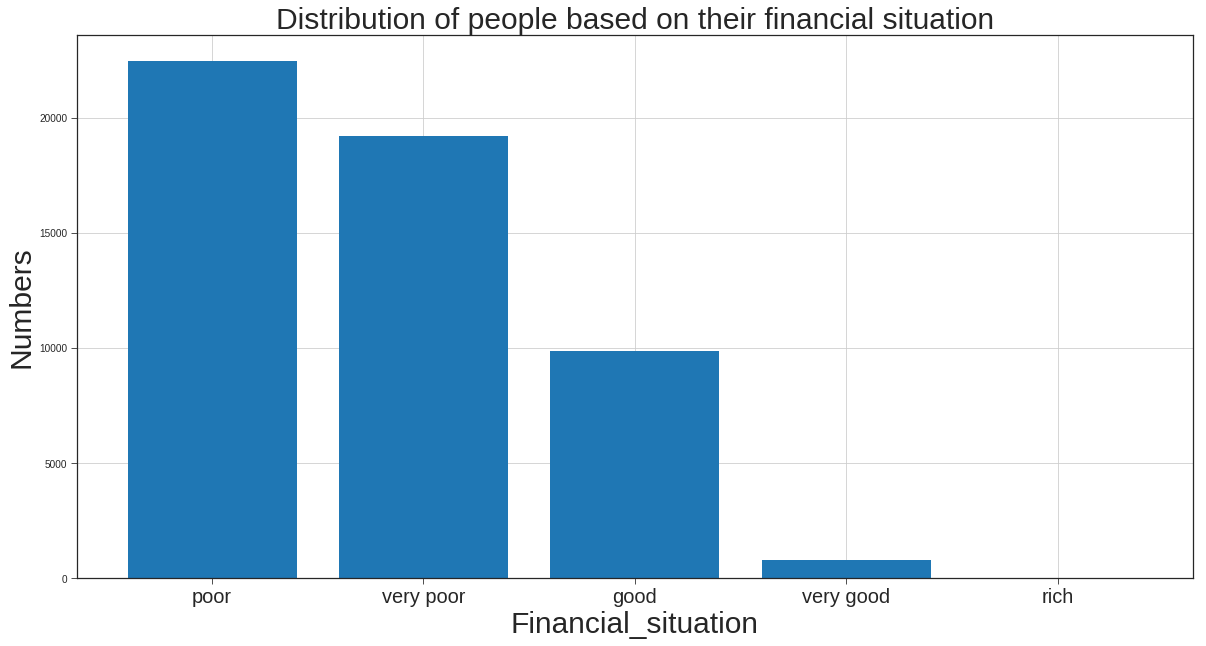

In [56]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn-ticks')
plt.bar(data_use['financial_situation'].unique(), data_use['financial_situation'].value_counts())
plt.xlabel('Financial_situation').set_fontsize(30)
plt.ylabel('Numbers').set_fontsize(30)
plt.title('Distribution of people based on their financial situation').set_fontsize(30)
plt.xticks(rotation=0, fontsize=20)
plt.grid()
plt.show()

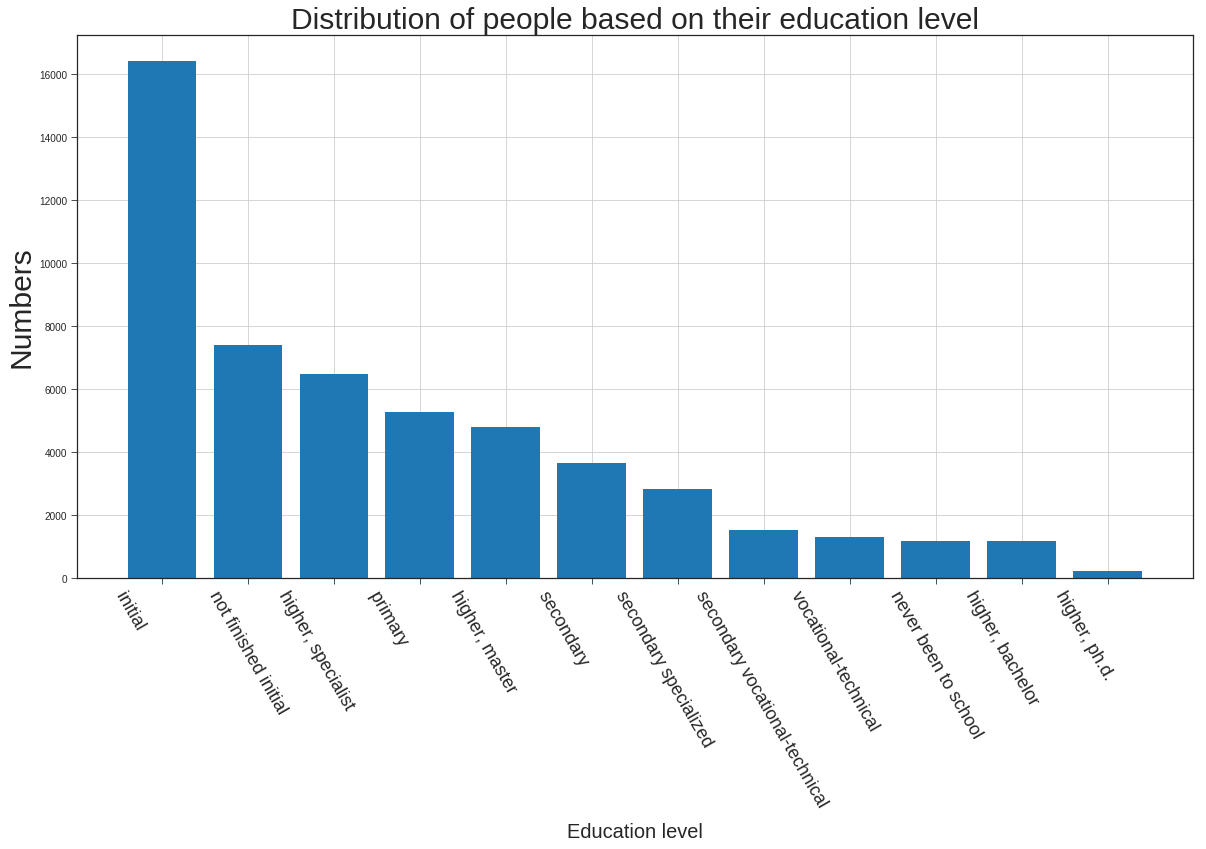

In [57]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn-ticks')
plt.bar(data_use['education'].unique(), data_use['education'].value_counts())
plt.xlabel('Education level').set_fontsize(20)
plt.ylabel('Numbers').set_fontsize(30)
plt.title('Distribution of people based on their education level').set_fontsize(30)
plt.xticks(rotation=-60, fontsize=18)
plt.grid()
plt.show()

Large number of people have very basic or average education levels.

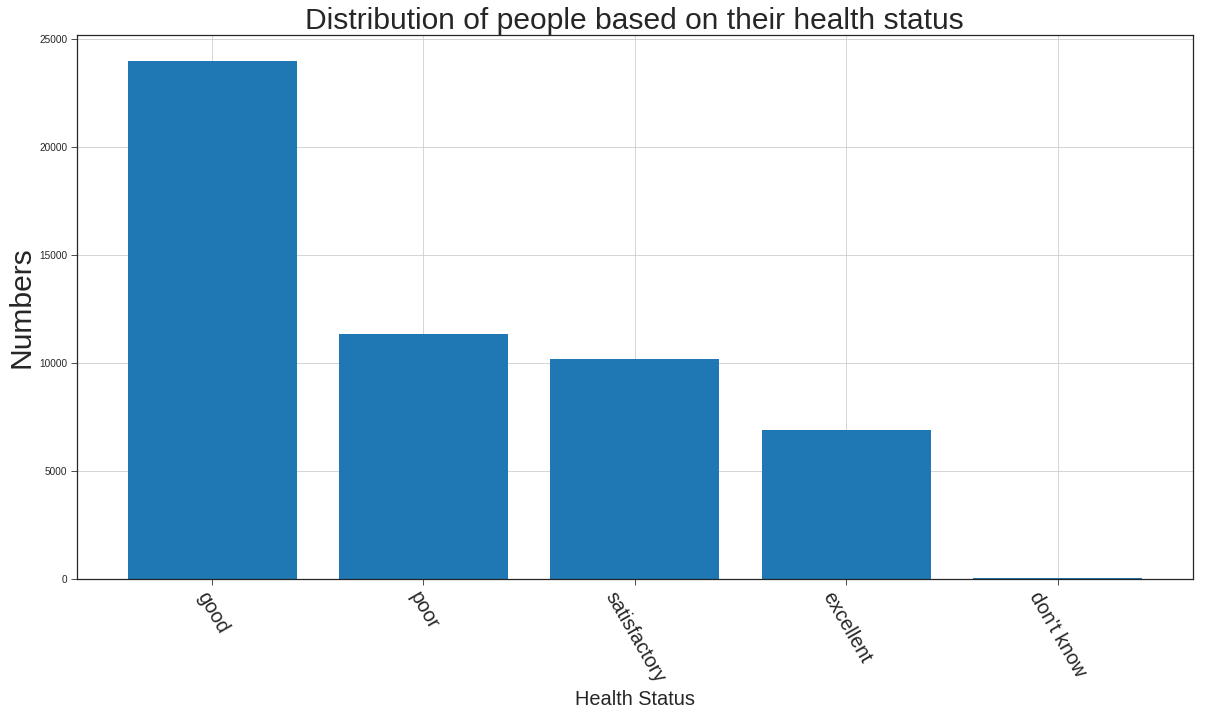

In [58]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn-ticks')
plt.bar(data_use['health'].unique(), data_use['health'].value_counts())
plt.xlabel('Health Status').set_fontsize(20)
plt.ylabel('Numbers').set_fontsize(30)
plt.title('Distribution of people based on their health status').set_fontsize(30)
plt.xticks(rotation=-60, fontsize=20)
plt.grid()
plt.show()

Most people consider their health status as good.

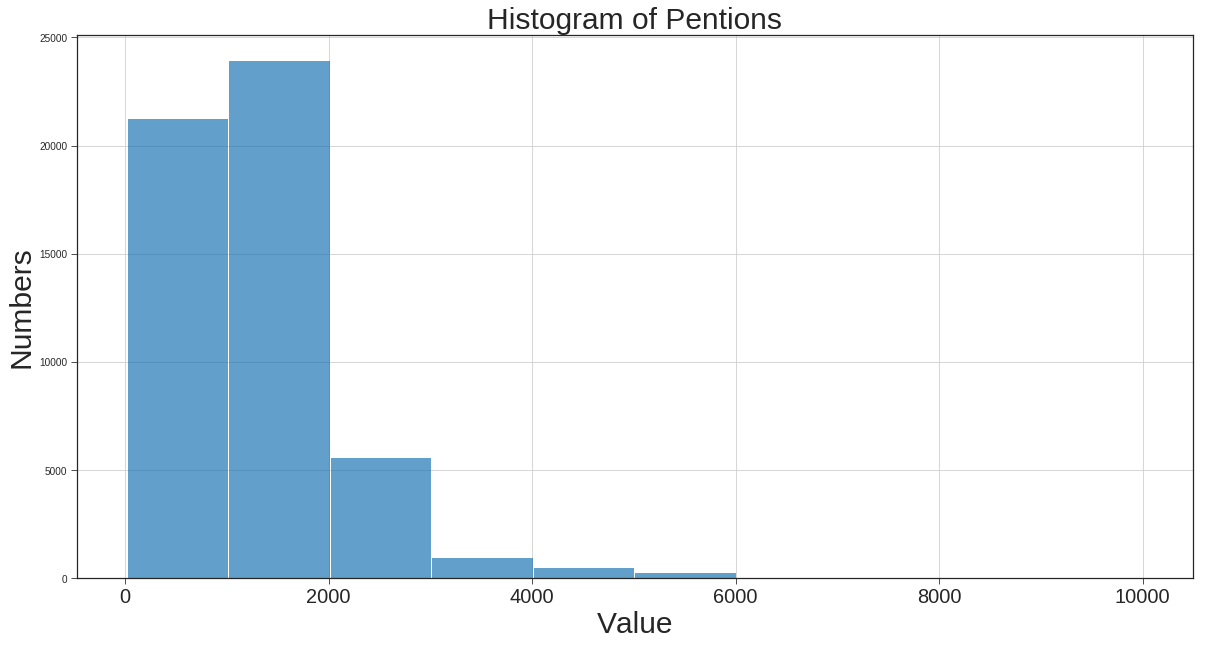

In [59]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn-ticks')
plt.hist(data_use['pention1'], alpha=0.7, rwidth=0.99)
plt.xlabel('Value').set_fontsize(30)
plt.ylabel('Numbers').set_fontsize(30)
plt.title('Histogram of Pentions').set_fontsize(30)
plt.xticks(rotation=0, fontsize=20)
plt.grid()
plt.show()

We see a concentration of low pensions of people. The distribution seem somewhat similar to the beta distribution with parameters $\alpha = 2$  and  $\beta = 5$

## 5. Modeling and Hypothesis Testing
We will use a one way ANOVA to test if there is any relationship between the predictors and the dependent variable the pension.
<br>
The Null hypothesis H0 is that the distributions are the same, so there is no relationship.
<br>
The alternative hypothesis Ha is that there is a difference, so there is a relationships.
For more information on the topic view this link:
https://en.wikipedia.org/wiki/One-way_analysis_of_variance

In [60]:
df_anova = data_use[['pention1', 'health']]
grps = pd.unique(df_anova.health.values)
d_data = {grp:df_anova['pention1'][df_anova.health == grp] for grp in grps}

In [61]:
F, p = stats.f_oneway(d_data['good'], d_data['excellent'], d_data['excellent'], d_data['satisfactory'],
                      d_data['poor'],d_data["don't know"])
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  0.0
Reject null hypothesis


In [62]:
df_anova = data_use[['pention1', 'education']]
grps = pd.unique(df_anova.education.values)
d_data = {grp:df_anova['pention1'][df_anova.education == grp] for grp in grps}

In [63]:
F, p = stats.f_oneway(d_data['not finished initial'], d_data['initial                         '],
                      d_data['higher, specialist              '], 
                      d_data['primary                         '],d_data['higher, master                  '],
                      d_data['secondary                       '],
                     d_data['secondary specialized           '],d_data['secondary vocational-technical  '],
                      d_data['vocational-technical            '], 
                      d_data['never been to school'],d_data['higher, bachelor                '],
                     d_data['higher, ph.d.                   '])
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  0.0
Reject null hypothesis


Depending on the p-value we reject or accept the null hypothesis. In all of our cases we reject it. So there is a present relationship. One of the drawbacks of the this analysis is the assumption of a normal distribution of the data. Because ours does not seem to have a normal distribution we will use another method the non parametric Kruskal–Wallis one-way analysis of variance. You can find more on the topic here:
https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance

In [64]:
df_anova = data_use[['pention1', 'financial_situation']]
grps = pd.unique(df_anova.financial_situation.values)
d_data = {grp:df_anova['pention1'][df_anova.financial_situation == grp] for grp in grps}

In [65]:
F, p = stats.f_oneway(d_data['poor'], d_data['very poor'], d_data['good'], d_data['very good'],
                      d_data['rich'])
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  0.0
Reject null hypothesis


Now we will try to use the 2 way ANOVA to use all of the variables. For more information on the topic you can view here:
https://en.wikipedia.org/wiki/Two-way_analysis_of_variance

In [66]:
model = ols('pention1 ~ C(health) + C(education) * C(financial_situation)', data_use).fit()

    # Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 53, 52338) =  115.665, p =  0.0000


The model consist of adding the health variable with the product of the education and the financial_situation.The conclusion is the same. The variables do have an effect on the pension levels.

In [67]:
k2, p = stats.normaltest(data_use[data_use['health']== 'good']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [68]:
k2, p = stats.normaltest(data_use[data_use['health']== 'excellent']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [69]:
k2, p = stats.normaltest(data_use[data_use['health']== 'satisfactory']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [70]:
k2, p = stats.normaltest(data_use[data_use['health']== 'poor']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [71]:
k2, p = stats.normaltest(data_use[data_use['health']== "don't know"]['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.05917
The null hypothesis cannot be rejected


The normalisy test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) have been used to acess if the distribution is normal or not for the pensions depending on the health variable. Only the Don't know cateogory is insufficient to reject the null hypothesis, but its absolute frquency is very low, so we will, not address the issue more. Meaning that the populations are not normaly distributed.

In [72]:
len(data_use[data_use['health']== 'excellent']['pention1'])

11339

In [73]:
len(data_use[data_use['health']== 'poor']['pention1'])

6888

We will now try to use the non paramteric Spearman rank correlation coefficent. For more information on the topic you can view here: https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient. The test does not assume normal distribution. First we need to match the number of observations. In our case the 2 comparisons are the populations of the different health statuses. The poor health quantity is less, so we will remove parts of the excelent.

In [74]:
stats.spearmanr(data_use[data_use['health']== 'excellent']['pention1'][0:6888]
                , data_use[data_use['health']== 'poor']['pention1'])

SpearmanrResult(correlation=0.020244049274967774, pvalue=0.09295705242568156)

There seems to be some dependency between the 2 populations of the health status.

In [75]:
F, p = stats.kruskal(data_use[data_use['health']== 'excellent']['pention1'],
                      data_use[data_use['health']== 'poor']['pention1'] )
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  2.132428954707578e-230
Reject null hypothesis


In [76]:
F, p = stats.kruskal(data_use[data_use['health']== 'good']['pention1'],
                      data_use[data_use['health']== 'satisfactory']['pention1'] )
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  3.073432956639389e-160
Reject null hypothesis


The 2 Kruskal-Wallis tests shows for that there is a connection between the health status and the pension. 

In [77]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['health']== 'excellent']['pention1'],
                      data_use[data_use['health']== 'poor']['pention1'], alternative ='less')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  1.066264741767595e-230
Reject null hypothesis


In [78]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['health']== 'good']['pention1'],
                      data_use[data_use['health']== 'poor']['pention1'], alternative ='less')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  2.58180341598765e-128
Reject null hypothesis


In [79]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['health']== 'satisfactory']['pention1'],
                      data_use[data_use['health']== 'poor']['pention1'], alternative ='less')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  0.948038596771298
Accept null hypothesis


In [80]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['health']== 'satisfactory']['pention1'],
                      data_use[data_use['health']== 'good']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  1.5367414076244768e-160
Reject null hypothesis


In [81]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['health']== 'satisfactory']['pention1'],
                      data_use[data_use['health']== 'excellent']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  1.4165210593375793e-261
Reject null hypothesis


In [82]:
print(data_use[data_use['health']== 'good']['pention1'].mean())
print(data_use[data_use['health']=='excellent']['pention1'].mean())
print(data_use[data_use['health']== 'satisfactory']['pention1'].mean())
print(data_use[data_use['health']== 'poor']['pention1'].mean())
print(data_use[data_use['health']=="don't know"]['pention1'].mean())

1172.3564872757613
1035.6697239615487
1399.5917444717445
1371.9382984901279
2048.8


Mann–Whitney U test was performed to access the relationship beween the health status and the pensions. It seems that the pensioners with the poorer health status have a higher pension. This is although not present with between the satifactory and the poor health status. For more information on the test you can see here:
https://ipfs.io/ipfs/QmXoypizjW3WknFiJnKLwHCnL72vedxjQkDDP1mXWo6uco/wiki/Mann–Whitney_U_test.html

In [83]:
k2, p = stats.normaltest(data_use[data_use['education']== 'higher, ph.d.                   ']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 5.02945e-09
The null hypothesis can be rejected


In [84]:
k2, p = stats.normaltest(data_use[data_use['education']== 'not finished initial']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [85]:
k2, p = stats.normaltest(data_use[data_use['education']== 'secondary vocational-technical  ']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [86]:
k2, p = stats.normaltest(data_use[data_use['education']== 'higher, bachelor                ']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.20332e-123
The null hypothesis can be rejected


In [87]:
k2, p = stats.normaltest(data_use[data_use['education']== 'higher, master                  ']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 7.99709e-128
The null hypothesis can be rejected


In [88]:
k2, p = stats.normaltest(data_use[data_use['education']== 'secondary                       ']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [89]:
k2, p = stats.normaltest(data_use[data_use['education']== 'primary                         ']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [90]:
k2, p = stats.normaltest(data_use[data_use['education']== 'never been to school']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.59379e-49
The null hypothesis can be rejected


All of the populations are not having a normal distribution. We will again proceed with Mann–Whitney U test. We state the alternative hypothesis as the first population having a statically higher mean then the second. The null hypothesis is that they are the same.

In [91]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['education']== 'higher, ph.d.                   ']['pention1'],
                      data_use[data_use['education']== 'not finished initial']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  3.794381960844234e-47
Reject null hypothesis


In [92]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['education']== 'higher, ph.d.                   ']['pention1'],
                      data_use[data_use['education']== 'primary                         ']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  6.235689592591135e-25
Reject null hypothesis


In [93]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['education']== 'higher, ph.d.                   ']['pention1'],
                      data_use[data_use['education']== 'secondary                       ']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  2.8207918094542113e-11
Reject null hypothesis


In [94]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['education']== 'higher, ph.d.                   ']['pention1'],
                      data_use[data_use['education']== 'secondary specialized           ']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  5.517724835398561e-08
Reject null hypothesis


In [95]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['education']== 'higher, ph.d.                   ']['pention1'],
                      data_use[data_use['education']== 'vocational-technical            ']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  2.0277852612492133e-13
Reject null hypothesis


In [96]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['education']== 'higher, ph.d.                   ']['pention1'],
                      data_use[data_use['education']== 'higher, specialist              ']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  0.008656751284442366
Reject null hypothesis


In [97]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['education']== 'higher, ph.d.                   ']['pention1'],
                      data_use[data_use['education']== 'higher, master                  ']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  0.0013952020158243756
Reject null hypothesis


In [98]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['education']== 'higher, master                  ']['pention1'],
                      data_use[data_use['education']== 'higher, bachelor                ']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  1.6962998494495033e-08
Reject null hypothesis


In [99]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['education']== 'higher, master                  ']['pention1'],
                      data_use[data_use['education']== 'higher, specialist              ']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  0.710690782326092
Accept null hypothesis


In [100]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['education']== 'higher, bachelor                ']['pention1'],
                      data_use[data_use['education']== 'secondary specialized           ']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  0.93751409535605
Accept null hypothesis


In [101]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['education']== 'higher, bachelor                ']['pention1'],
                      data_use[data_use['education']== 'secondary vocational-technical  ']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  0.09761061258012049
Accept null hypothesis


In [102]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['education']== 'higher, master                  ']['pention1'],
                      data_use[data_use['education']== 'secondary vocational-technical  ']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  6.830275706094211e-27
Reject null hypothesis


In [103]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['education']== 'higher, master                  ']['pention1'],
                      data_use[data_use['education']== 'secondary vocational-technical  ']['pention1'], alternative ='greater')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  6.830275706094211e-27
Reject null hypothesis


The performed tests indicate that with better education comes higher pention. This is not always the case for example some people with secondary specialized education do have higher pentions then bachelors.

In [104]:
print(data_use[data_use['education']== 'not finished initial']['pention1'].mean())
print(data_use[data_use['education']=='initial                         ']['pention1'].mean())
print(data_use[data_use['education']== 'higher, specialist              ']['pention1'].mean())
print(data_use[data_use['education']== 'primary                         ']['pention1'].mean())
print(data_use[data_use['education']=="higher, master                  "]['pention1'].mean())
print(data_use[data_use['education']== 'secondary                       ']['pention1'].mean())
print(data_use[data_use['education']=='secondary specialized           ']['pention1'].mean())
print(data_use[data_use['education']== 'secondary vocational-technical  ']['pention1'].mean())
print(data_use[data_use['education']== 'vocational-technical            ']['pention1'].mean())
print(data_use[data_use['education']=="never been to school"]['pention1'].mean())
print(data_use[data_use['education']== 'higher, bachelor                ']['pention1'].mean())
print(data_use[data_use['education']=="higher, ph.d.                   "]['pention1'].mean())

832.2723311546841
1004.135039309388
1629.2562814070352
1123.1535418695228
1597.4994690265487
1324.6948835274543
1405.214073473798
1351.000378000378
1241.1495145631068
878.234935163997
1399.5984911986588
1880.7739130434782


Finally we move to the financial status. The normalisy test shows that the distribution is not normal.

In [105]:
k2, p = stats.normaltest(data_use[data_use['financial_situation']== 'poor']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [106]:
k2, p = stats.normaltest(data_use[data_use['financial_situation']== 'very poor']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.64474e-303
The null hypothesis can be rejected


In [107]:
k2, p = stats.normaltest(data_use[data_use['financial_situation']== 'good']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [108]:
k2, p = stats.normaltest(data_use[data_use['financial_situation']== 'very good']['pention1'])
print("p = {:g}".format(p))
p 
if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 3.39023e-137
The null hypothesis can be rejected


In [109]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['financial_situation']== 'poor']['pention1'],
                      data_use[data_use['financial_situation']== 'good']['pention1'], alternative ='less')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  6.813399368854946e-14
Reject null hypothesis


In [110]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['financial_situation']== 'very poor']['pention1'],
                      data_use[data_use['financial_situation']== 'good']['pention1'], alternative ='less')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  0.0
Reject null hypothesis


In [111]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['financial_situation']== 'good']['pention1'],
                      data_use[data_use['financial_situation']== 'very good']['pention1'], alternative ='less')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  0.44036126730257436
Accept null hypothesis


In [112]:
u_statistic, p = stats.mannwhitneyu(data_use[data_use['financial_situation']== 'very poor']['pention1'],
                      data_use[data_use['financial_situation']== 'poor']['pention1'], alternative ='less')
print("P-value for significance is: ", p)
if p<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

P-value for significance is:  0.0
Reject null hypothesis


We can see that the higher the pention the better the financial status. This is entirely logical.

In [113]:
print(data_use[data_use['financial_situation']== 'poor']['pention1'].mean())
print(data_use[data_use['financial_situation']=='very poor']['pention1'].mean())
print(data_use[data_use['financial_situation']== 'good']['pention1'].mean())
print(data_use[data_use['financial_situation']== 'very good']['pention1'].mean())

1238.4464961067854
876.8548387096774
1347.6690250754343
1432.3967661691543


## 6. Conclusion
All the test show that there is a relationship between the variables and the pension. More work is needed to determine the strength and way of the relationship.

## 7. References:
1. https://www.worldbank.org/
2. https://www.wikipedia.org/
3. https://medium.com
4. https://towardsdatascience.com